# Nueral Network
- 데이터로부터 가중치의 매개변수 값을 자동으로 학습하도록 함
- Perceptron
> $ y =
\begin{cases}
0, & \mbox{if }(w_1x_1+w_2x_2+b\le \theta) \mbox{}\\  
1, & \mbox{if }(w_1x_1+w_2x_2+b > \theta )\mbox{}
\end{cases}$
- NN
> $ y = h(b+w_1x_1+w_2x_2)
\\h(x) =
\begin{cases}
0, & \mbox{x } \le 0\mbox{}\\  
1, & \mbox{x}>0\mbox{}
\end{cases}$
- $h(x)$(활성함수,activation function): 입력신호의 총합을 출력신호로 변환하는 함수, 즉 입력신호의 총합이 활성화를 일으키는 지 정하는 역할

## 활성화 함수


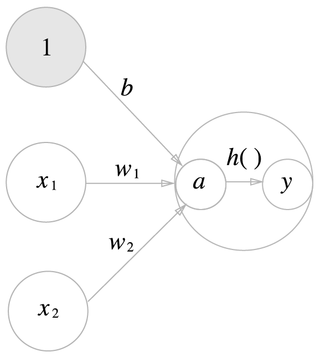

In [10]:
from IPython.display import Image 
Image("Pictures/activation.png")

### 계단함수
- 임계값을 경계로 출력을 바꿈 $\rightarrow$ 퍼셉트론은 계단함수를 이용한다고 할 수 있음

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([-1.0, 1.0, 2.0])
y = x>0
print(y) # bool type 
print(y.astype(np.int32)) # change to int type

[False  True  True]
[0 1 1]


In [3]:
def step_function(x):
    return np.array(x>0, dtype= np.int32)

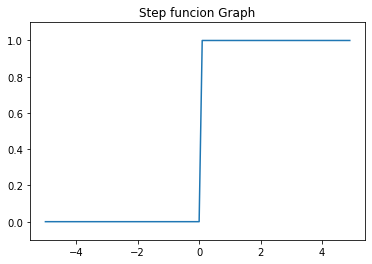

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위
plt.title('Step funcion Graph')
plt.show()

### Sigmoid함수
> $ \sigma(x) = \frac{1}{1+e^{-x}}$

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

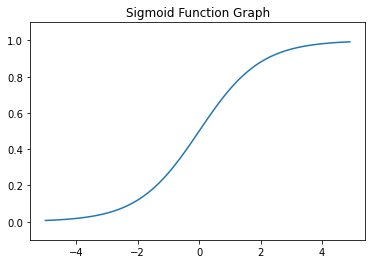

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('Sigmoid Function Graph')
plt.show()

**sigmoid  and step function 차이점**
- 시그모이드는 부드러운 곡선으로 입력에 따라 출력값이 연속적으로 변함(연속적인 실수)
- 계단함수는 0에서 1로 출력이 갑자기 바뀜

**sigmoid  and step function 유사점**
- 시그모이드와 계단함수 모두 비선형 함수
- 입력값이 중요하면 큰 값을 출력, 중요하지 않으면 작은 값을 출력하며 0과 1사이의 값을 가짐

*신경망에서 비선형 함수를 사용해야하는 이유: 선형함수를 사용하는 것은 신경망을 쌓아 층을 깊게 하는 은닉층을 생성하는 의미가 없어지기 때문 임. 선형을 깊게 쌓아도 은닉을 사용하지 않은 것으로 표현 가능하다. 따라서 층을 쌓아 그로인한 혜택을 얻고 싶다면 활성화 함수는 반드시 비선형이어야 한다.*

### ReLU함수(Rectified Linear Unite)
- 입력이 0 이상이면 입력 그대로를 출력하고 0 이하 이면 0을 출력하는 함수
> $h(x) =
\begin{cases}
x, & \mbox{x}>0\mbox{}\\
0, & \mbox{x } \le 0\mbox{}
\end{cases}$

In [12]:
def relu(x):
    return np.maximum(0, x)

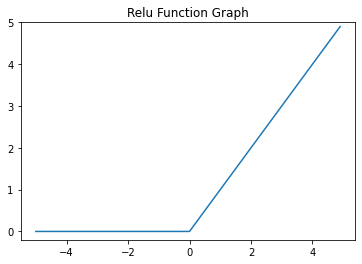

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.2, 5.0)
plt.title('Relu Function Graph')
plt.show()

## 다층 신경망 구현


In [18]:
# 항등함수, 입력을 그대로 출력하는 함수
def identity_function(x):
    return x

In [22]:
# 가중치와 편향을 초기화,  network 딕셔너리 함수에 저장
def init_network():
    network ={}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

# 입력을 출력으로 변환하는 처리 구현, 순전파 forward
def forward(network, x):
    W1 , W2, W3 = network['W1'], network['W2'], network['W3']
    b1 , b2, b3 = network['b1'], network['b2'], network['b3']
    
    z1 = np.dot(x, W1) +b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) +b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) +b3
    y = identity_function(z3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## 출력계층 설계
- 항등함수(Identity Function): 입력을 그대로 출력(입력과 출력이 항상 같음)
- 소프트 맥스(Softmax Fucntion)
> $y_k = \frac{exp(a_k)}{\sum_{i=1}^{n} exp(a_k)} $  
> 분자는 입력신호의 지수함수,  분모는 모든 입력신호 지수함수의 합

- **소프트 맥스 특징**
    - 0과 1사이의 실수를 출력, **출력의 총합은 1**
    - 확률로 해석할 수 있음 
    -소프트 맥수 함수를 적용해도 각 원소의 대소관계는 변하지 않음(단조함수)
    - 신경망 분류에서 가장 큰 출력을 내는 뉴런에 해당하는 클래스만 인식하므로 출력층의 소프트 맥스함수를 생략
    - 신경망을 학습시킬 때는 소프트 맥스 함수 사용함
    
- **소프트 맥스 구현시 주의점**
>지수함수는 아주 쉽게 큰 값을 만들어 낸다.  
$e^{10}= 20,000$이 넘고 $e^{1000}$은 inf가 되어 나눗셈을 하면  수치가 불안정 해짐(오버플로, overflow)


> **Overflow를 개선한 수식**
> $$y_k = \frac{exp(a_k)}{\sum_{i=1}^{n} exp(a_k)} = \frac{Cexp(a_k)}{C\sum_{i=1}^{n} exp(a_k)}= \frac{exp(a_k+logC)}{\sum_{i=1}^{n} exp(a_k+logC)}= \frac{exp(a_k+C')}{\sum_{i=1}^{n} exp(a_k+C')} $$

In [23]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

In [28]:
a = np.array([1010, 1000, 990])
# np.exp(a)/np.sum(np.exp(a)) # 잘 계산되지 않는다. 
c = np.max(a)
print(a-c)
np.exp(a-c)/np.sum(np.exp(a-c))

[  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [29]:
# overflow를 개선한 softmax
def softmax(a):
    C = np.max(a)
    exp_a = np.exp(a-c) #오버플로 대책
    sum_exp_a= np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

### 출력층 뉴런수 
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적, ex) 0-9숫자 이미지의 경우 10개의 출력층
### 배치처리
- 배치: 입력데이터를 묶은 것
- 큰 배열 보다 작은 배열이 더 빠르게 계산됨(계산 효율성)

**Summary**
- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLu함수와 같은 매끄럽게 변화하는 함수를 이용한다.
- 기계학습은 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등함수를 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다. 

***Reference***
밑바닥부터 시작하는 딥러닝, 사이토 고키 